# Análisis y Curación de datos - Feature Engineering

## Importación de librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy.stats import norm

warnings.filterwarnings('ignore')

## Importación de datos 

In [5]:
data = pd.read_csv("loan.csv")

In [6]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## Recategorización de variables

In [8]:
data['occupation'].unique()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [9]:
data['occupation'].value_counts()

occupation
Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: count, dtype: int64

In [10]:
dic_occupation = {'engineer': ['Engineer'],
                  'pilot':['Pilot'],
                  'lawyer':['Lawyer'],
                  'language': ['Editor','Writer','Researcher'],
                  'gastronomy' : ['Chef','Server'],
                  'marketing and sales': ['Salesman', 'Marketing', 'Sales'],
                  'art': ['Musician','Artist','Stylist','Photographer'],
                  'architecture': ['Architect', 'Designer','Electrician'],
                  'it': ['IT','Programmer','Software','Analyst','HR'],
                  'health': ['Dentist','Pharmacist','Psychologist','Doctor','Nurse','Veterinarian'],
                  'education': ['Teacher','Professor','Student'],
                  'administration and finance' : ['Manager', 'Accountant','Consultant', 'Realtor','Receptionist','Banker']
}

In [11]:
data['new_occupation']= data['occupation']
for i in dic_occupation:
    data['new_occupation'] = data['new_occupation'].replace(dic_occupation[i], i)
data[['occupation','new_occupation']].sample(5)

,occupation,new_occupation
54,Salesman,marketing and sales
50,Consultant,administration and finance
36,Engineer,engineer
51,Designer,architecture
47,Doctor,health


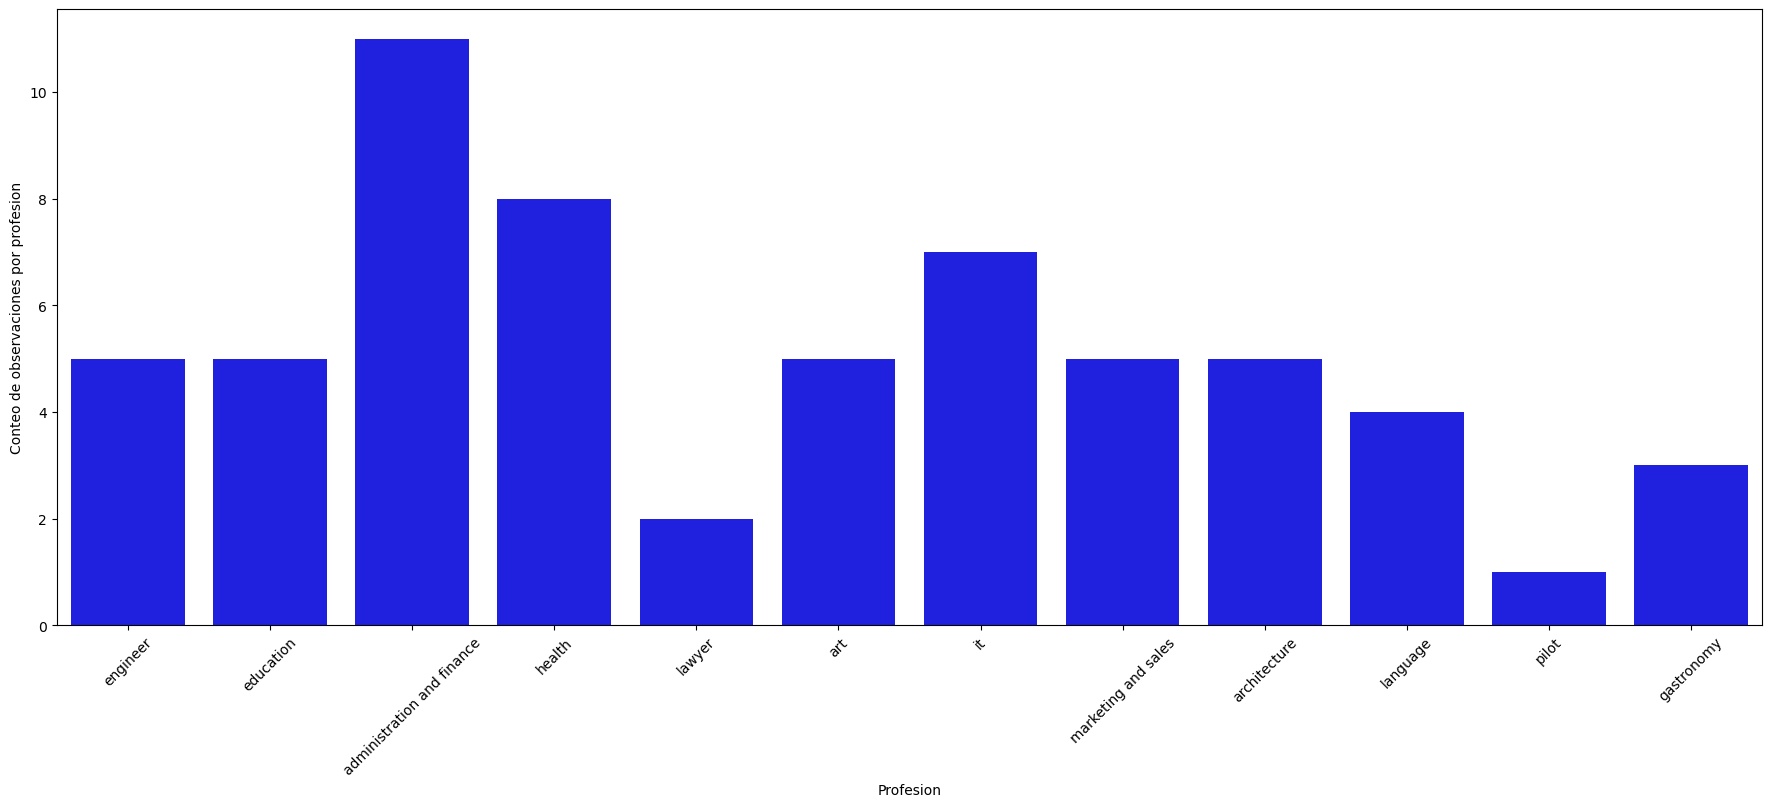

In [12]:
fig = plt.figure(figsize=(22,8))
sns.countplot(data=data, x='new_occupation',
                color='blue')
plt.xticks(rotation=45)
plt.ylabel("Conteo de observaciones por profesion")
plt.xlabel("Profesion")
plt.ticklabel_format(style='plain', axis='y')

## Creación de rangos

In [14]:
data['income'].describe()

count        61.000000
mean      78983.606557
std       33772.025802
min       25000.000000
25%       52000.000000
50%       78000.000000
75%       98000.000000
max      180000.000000
Name: income, dtype: float64

In [15]:
# Definir los límites de los rangos
limites_income = [20000, 30000, 40000, 50000, 60000, 70000, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_income = ['20000-30000', '30000-40000', '40000-50000', '50000-60000','60000-70000', '70000+']

# Crear la columna 'rango_dias_solicitados' con los rangos correspondientes
data['new_income'] = pd.cut(data['income'], bins=limites_income, labels=etiquetas_income, right=False)

In [16]:
data[['income','new_income']].sample(5)

,income,new_income
57,32000,30000-40000
55,120000,70000+
16,88000,70000+
58,95000,70000+
31,85000,70000+


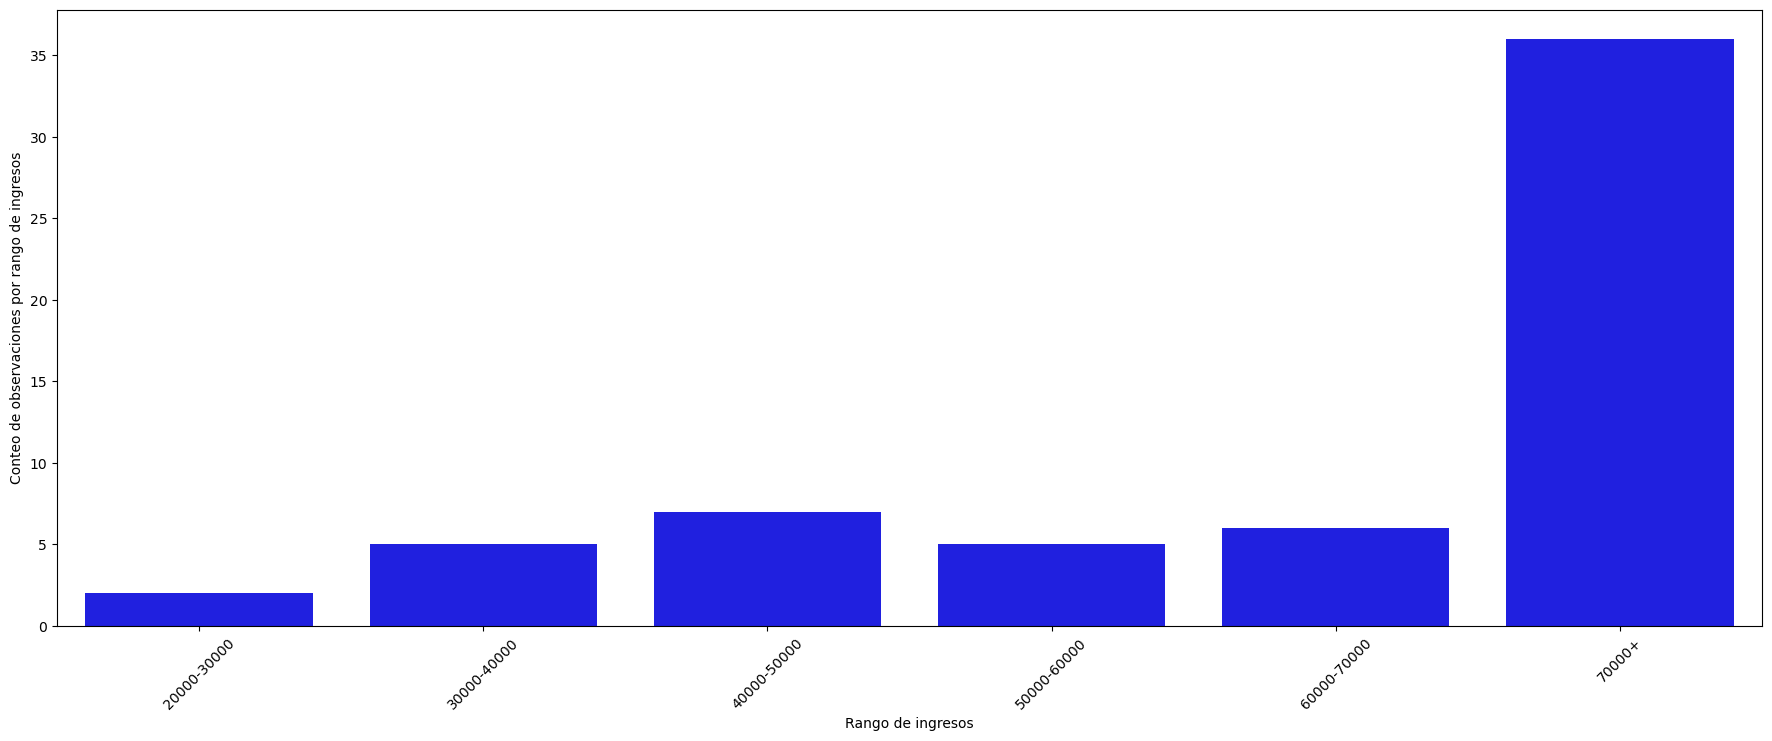

In [17]:
fig = plt.figure(figsize=(22,8))
sns.countplot(data=data, x='new_income',
                color='blue')
plt.xticks(rotation=45)
plt.ylabel("Conteo de observaciones por rango de ingresos")
plt.xlabel("Rango de ingresos")
plt.ticklabel_format(style='plain', axis='y')

## Codificación de variables categóricas 

In [19]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,new_occupation,new_income
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,engineer,70000+
1,45,Female,Teacher,Master's,Single,62000,680,Approved,education,60000-70000
2,28,Male,Student,High School,Single,25000,590,Denied,education,20000-30000
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,administration and finance,70000+
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,administration and finance,70000+


In [20]:
data_encoded = data.drop(columns={'occupation','income'})

In [21]:
numerical_columns = data_encoded.select_dtypes(include='number').columns.to_list()
numerical_columns

['age', 'credit_score']

In [22]:
categorical_columns = data_encoded.select_dtypes(include=['object','category']).columns.to_list()
categorical_columns.remove('loan_status')

In [23]:
categorical_columns

['gender', 'education_level', 'marital_status', 'new_occupation', 'new_income']

### Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

gender_level_ =LabelEncoder()
education_level_=LabelEncoder()
marital_status_=LabelEncoder()
new_occupation_=LabelEncoder()
new_income_ =LabelEncoder()



In [26]:
data_encoded['gender'] = gender_level_.fit_transform(data_encoded['gender'])
data_encoded['education_level'] = education_level_.fit_transform(data_encoded['education_level'])
data_encoded['marital_status'] = marital_status_.fit_transform(data_encoded['marital_status'])
data_encoded['new_occupation'] = new_occupation_.fit_transform(data_encoded['new_occupation'])
data_encoded['new_income'] = new_income_.fit_transform(data_encoded['new_income'])

data_encoded.head()

,age,gender,education_level,marital_status,credit_score,loan_status,new_occupation,new_income
0,32,1,1,0,720,Approved,4,5
1,45,0,4,1,680,Approved,3,4
2,28,1,3,1,590,Denied,3,0
3,51,0,1,0,780,Approved,0,5
4,36,1,1,0,710,Approved,0,5


### OneHotEncoder

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
data_encoded2 = data.drop(columns={'occupation','income'})

In [30]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(data_encoded2[categorical_columns])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(["Associate's", "Bachelor's", 'Doctoral', 'High School', "Master's"],
       dtype=object),
 array(['Married', 'Single'], dtype=object),
 array(['administration and finance', 'architecture', 'art', 'education',
        'engineer', 'gastronomy', 'health', 'it', 'language', 'lawyer',
        'marketing and sales', 'pilot'], dtype=object),
 array(['20000-30000', '30000-40000', '40000-50000', '50000-60000',
        '60000-70000', '70000+'], dtype=object)]

In [31]:
data_encoded2[categorical_columns]

,gender,education_level,marital_status,new_occupation,new_income
0,Male,Bachelor's,Married,engineer,70000+
1,Female,Master's,Single,education,60000-70000
2,Male,High School,Single,education,20000-30000
3,Female,Bachelor's,Married,administration and finance,70000+
4,Male,Bachelor's,Married,administration and finance,70000+
...,...,...,...,...,...
56,Male,Master's,Married,architecture,70000+
57,Female,High School,Single,administration and finance,30000-40000
58,Male,Bachelor's,Married,administration and finance,70000+
59,Female,Master's,Single,language,50000-60000


In [32]:
data_encoded2['gender'].nunique() + data_encoded2['education_level'].nunique() + data_encoded2['marital_status'].nunique() + data_encoded2['new_occupation'].nunique() + data_encoded2['new_income'].nunique()

27

In [33]:
data_encoded2[numerical_columns].shape[1]

2

In [34]:
encoded_types = encoder.transform(data_encoded2[categorical_columns])
encoded_types[:].shape

(61, 27)

In [35]:
data_numeric = data_encoded2[numerical_columns].values
data_numeric[:10]

array([[ 32, 720],
       [ 45, 680],
       [ 28, 590],
       [ 51, 780],
       [ 36, 710],
       [ 24, 640],
       [ 42, 790],
       [ 29, 620],
       [ 37, 750],
       [ 48, 820]])

In [36]:
matriz = np.hstack((encoded_types, data_numeric))
matriz.shape

(61, 29)

In [37]:
data_encoded['loan_status'] =data_encoded['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

## Importación de librerías

In [39]:
data_encoded.to_csv('data_encoded.csv',index=False)